## Packages

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Data Set

In [42]:
data_apartments = pd.read_excel('apartments_no_outliers_concatenated.xlsx', engine='openpyxl', dtype={'Zip Code': str})
data_houses = pd.read_excel('houses_no_outliers_concatenated.xlsx', engine='openpyxl', dtype={'Zip Code': str})

In [43]:
apartments_ratings = pd.read_excel('apartments_immonet_no_outliers.xlsx')
apartments_ratings.drop('Link', axis=1, inplace=True)
houses_ratings = pd.read_excel('houses_immonet_no_outliers.xlsx')
houses_ratings.drop('Link', axis=1, inplace=True)
houses_ratings.drop('House Type', axis=1, inplace=True)

apartments_ratings[apartments_ratings.columns[apartments_ratings.isna().any()]] = apartments_ratings[apartments_ratings.columns[apartments_ratings.isna().any()]].fillna(apartments_ratings.median())

houses_ratings[houses_ratings.columns[houses_ratings.isna().any()]] = houses_ratings[houses_ratings.columns[houses_ratings.isna().any()]].fillna(houses_ratings.median())


In [44]:
data_apartments1 = data_apartments[['Latitude','Longitude','Price']]
data_houses1 = data_houses[['Latitude','Longitude','Price']]

## Visualisations

In [45]:
interior_sizes1 = data_apartments['Interior Size']
prices1 = data_apartments['Price']

interior_sizes2 = data_houses['Interior Size']
exterior_sizes2 = data_houses['Exterior Size']

prices2 = data_houses['Price']

(0, 3500)

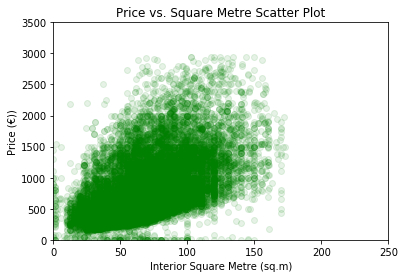

In [46]:
# Apartments
plt.scatter(interior_sizes1, prices1, c='green', marker='o', label='Price vs. Interior Square Meters', alpha=0.1)
plt.xlabel('Interior Square Metre (sq.m)')
plt.ylabel('Price (€))')
plt.title('Price vs. Square Metre Scatter Plot')

plt.xlim(0, 250) 
plt.ylim(0, 3500)

(0, 3500)

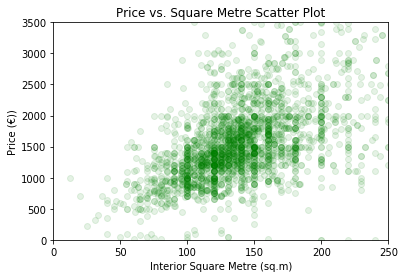

In [47]:
# Houses
plt.scatter(interior_sizes2, prices2, c='green', marker='o', label='Price vs. Interior Square Meters', alpha=0.1)
plt.xlabel('Interior Square Metre (sq.m)')
plt.ylabel('Price (€))')
plt.title('Price vs. Square Metre Scatter Plot')

plt.xlim(0, 250) 
plt.ylim(0, 3500)

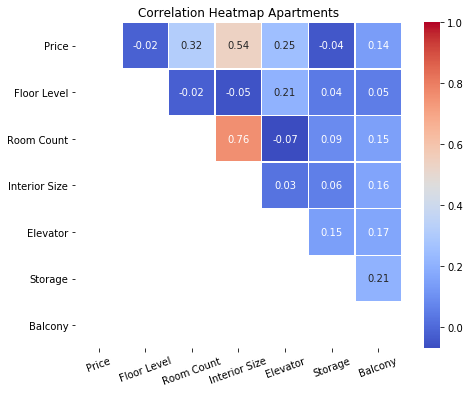

In [48]:
# Apartments Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_data = data_apartments[['Price', 'Zip Code', 'Floor Level', 'Room Count', 'Interior Size', 'Elevator','Storage','Balcony']]

correlation_matrix = numerical_data.corr()

mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, square=True, linewidths=.5)

plt.yticks(rotation=0)
plt.xticks(rotation=20)
plt.title('Correlation Heatmap Apartments')
plt.show()

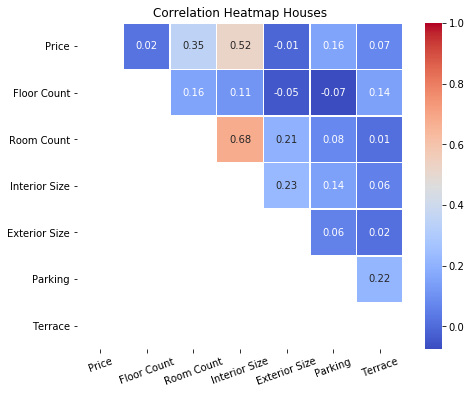

In [49]:
# House Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_data = data_houses[['Price', 'Zip Code', 'Floor Count', 'Room Count', 'Interior Size', 'Exterior Size','Parking','Terrace']]

correlation_matrix = numerical_data.corr()

mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, square=True, linewidths=.5)

plt.yticks(rotation=0)
plt.xticks(rotation=20)
plt.title('Correlation Heatmap Houses')
plt.show()

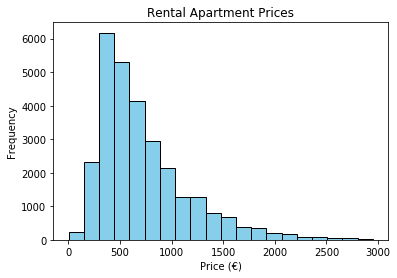

In [50]:
# Apartments Price Histogram
import matplotlib.pyplot as plt

prices = data_apartments['Price']

plt.hist(prices, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Rental Apartment Prices')
plt.show()

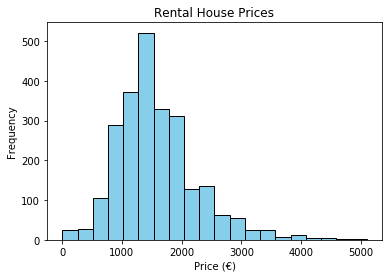

In [51]:
# Houses Price Histogram
import matplotlib.pyplot as plt

prices = data_houses['Price']

plt.hist(prices, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Rental House Prices')
plt.show()

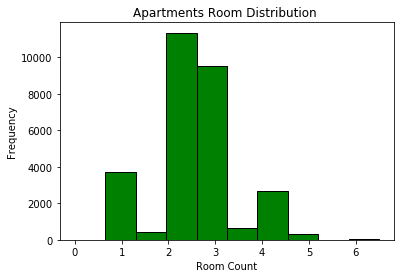

In [52]:
# Apartment Room Count Histogram

room_count_apartments = data_apartments['Room Count']

plt.hist(room_count_apartments, bins=10, color='green', edgecolor='black')

plt.xlabel('Room Count')
plt.ylabel('Frequency')
plt.title('Apartments Room Distribution ')
plt.show()

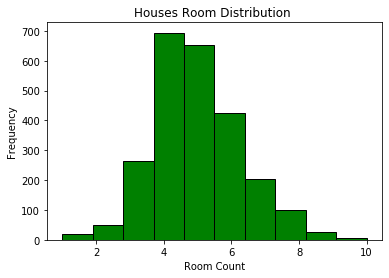

In [53]:
# House Room Count Histogram

room_count_houses = data_houses['Room Count']

plt.hist(room_count_houses, bins=10, color='green', edgecolor='black')

plt.xlabel('Room Count')
plt.ylabel('Frequency')
plt.title('Houses Room Distribution ')
plt.show()

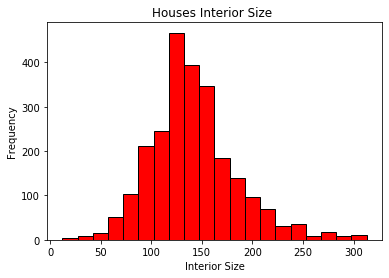

In [54]:
# Apartments Interior Size Histogram

int_size_houses = data_houses['Interior Size']

plt.hist(int_size_houses, bins=20, color='red', edgecolor='black')

plt.xlabel('Interior Size')
plt.ylabel('Frequency')
plt.title('Houses Interior Size ')
plt.show()

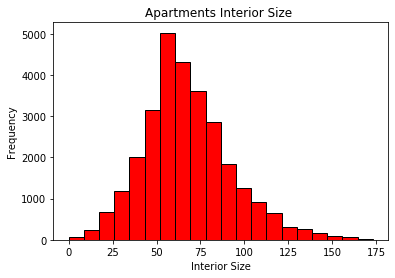

In [55]:
# Apartments Interior Size Histogram

int_size_apartments = data_apartments['Interior Size']

plt.hist(int_size_apartments, bins=20, color='red', edgecolor='black')

plt.xlabel('Interior Size')
plt.ylabel('Frequency')
plt.title('Apartments Interior Size ')
plt.show()

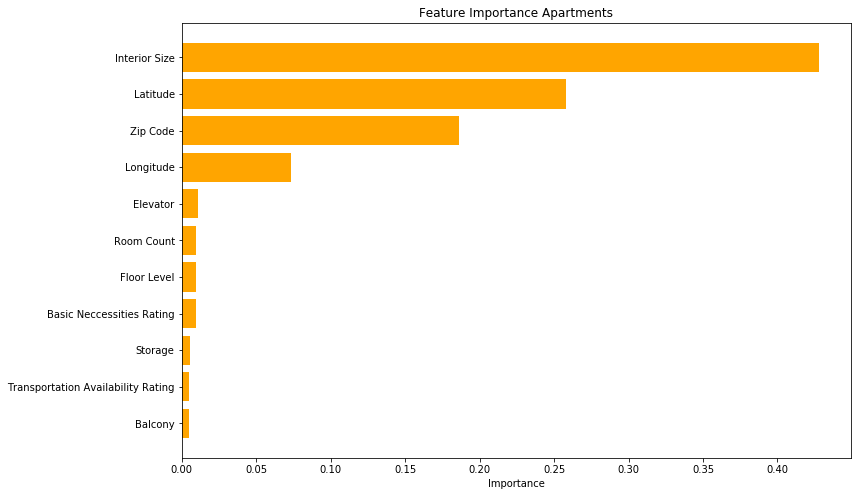

In [56]:

features = apartments_ratings.drop('Price', axis=1) 
target =  apartments_ratings['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color = 'orange')
plt.xlabel('Importance')
plt.title('Feature Importance Apartments')
plt.gca().invert_yaxis()
plt.show()

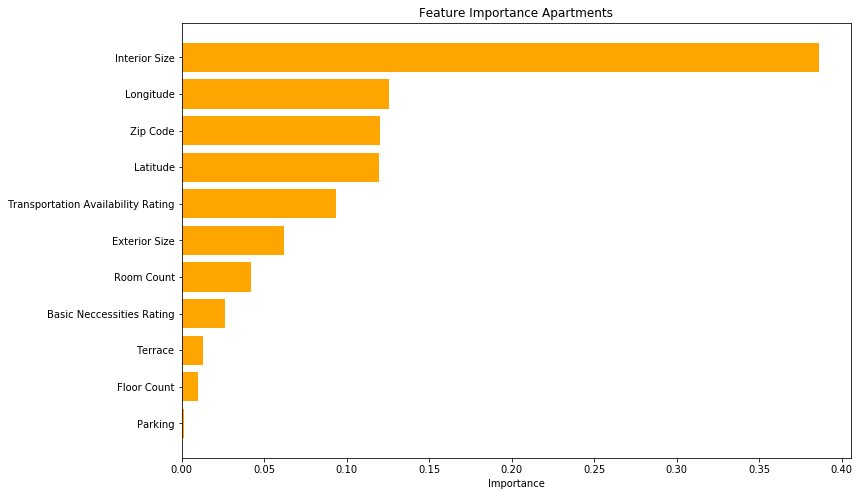

In [57]:
features = houses_ratings.drop('Price', axis=1) 
target =  houses_ratings['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color = 'orange')
plt.xlabel('Importance')
plt.title('Feature Importance Apartments')
plt.gca().invert_yaxis()
plt.show()

In [58]:
# Apartments Heatmap
fig = px.density_mapbox(data_apartments1, lat='Latitude', lon='Longitude', z='Price',
                        radius=10,
                        center=dict(lat=51.1657, lon=10.4515),
                        zoom=5,
                        mapbox_style='open-street-map',
                        opacity=0.4,  
                        color_continuous_scale='RdBu_r'  
                        )

fig.update_layout(coloraxis_colorbar=dict(title='Price'),
                  title='Density Heatmap of Apartment Rental Prices in Germany', width=620,  # Adjust the width
                  height=750)

fig.show()

In [59]:
# Houses Heatmap
fig = px.density_mapbox(data_houses1, lat='Latitude', lon='Longitude', z='Price',
                        radius=10,
                        center=dict(lat=51.1657, lon=10.4515),
                        zoom=5,
                        mapbox_style='open-street-map',
                        opacity=0.5,  # Adjust opacity
                        color_continuous_scale='RdBu_r'  # Use a different color scale
                        )

# Adjust color bar and add a title
fig.update_layout(coloraxis_colorbar=dict(title='Price'),
                  title='Density Heatmap of House Rental Prices in Germany', width=620,  # Adjust the width
                  height=750)

fig.show()

## Non Spatial Price Predictions

In [60]:
data_apartments_non_spatial = pd.read_excel('apartmentsNonSpatialPredictions.xlsx', engine='openpyxl', dtype={'Zip Code': str})
data_houses_non_spatial = pd.read_excel('housesNonSpatialPredictions.xlsx', engine='openpyxl', dtype={'Zip Code': str})

In [61]:
# Apartments Heatmap
fig = px.density_mapbox(data_apartments_non_spatial, lat='Latitude', lon='Longitude', z='Predictions',
                        radius=10,
                        center=dict(lat=51.1657, lon=10.4515),
                        zoom=5,
                        mapbox_style='open-street-map',
                        opacity=0.4,  
                        color_continuous_scale='RdBu_r'  
                        )

fig.update_layout(coloraxis_colorbar=dict(title='Price'),
                  title='Non spatial Price Predictions Apartments', width=620,  # Adjust the width
                  height=750)

fig.show()

In [62]:
# Houses Heatmap
fig = px.density_mapbox(data_houses_non_spatial, lat='Latitude', lon='Longitude', z='Predictions',
                        radius=10,
                        center=dict(lat=51.1657, lon=10.4515),
                        zoom=5,
                        mapbox_style='open-street-map',
                        opacity=0.4,  # Adjust opacity
                        color_continuous_scale='RdBu_r'  # Use a different color scale
                        )

# Adjust color bar and add a title
fig.update_layout(coloraxis_colorbar=dict(title='Price'),
                  title='Non spatial Price Predictions Houses', width=620,  # Adjust the width
                  height=750)

fig.show()

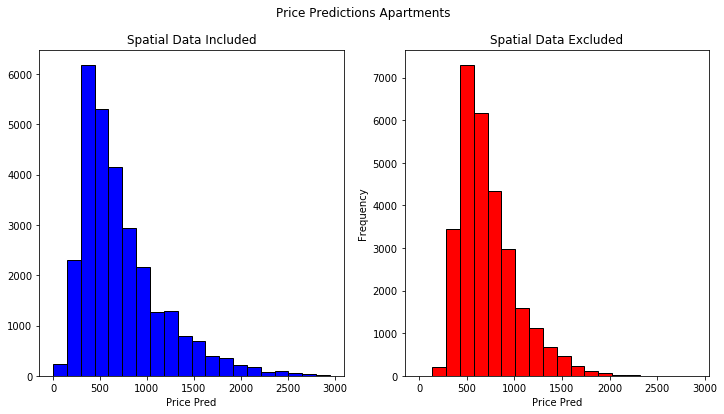

In [63]:
# Apartments Price Histogram

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(data_apartments['Price'], bins=20, color='blue', alpha=1, edgecolor='black')
axs[0].set_title('Spatial Data Included')
axs[0].set_xlabel('Price Pred')

axs[1].hist(data_apartments_non_spatial['Predictions'], bins=20, color='red', alpha=1,edgecolor='black')
axs[1].set_xlabel('Price Pred')
axs[1].set_title('Spatial Data Excluded')

plt.ylabel('Frequency')
plt.suptitle("Price Predictions Apartments")
# plt.tight_layout()
plt.show()


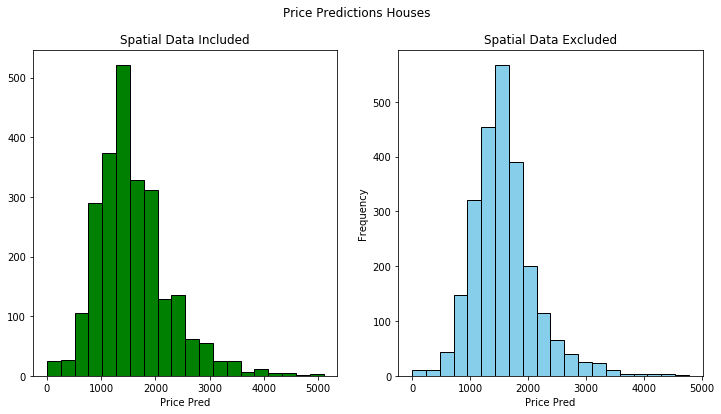

In [64]:
# Houses Price Histogram

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(data_houses['Price'], bins=20, color='green', alpha=1, edgecolor='black')
axs[0].set_title('Spatial Data Included')
axs[0].set_xlabel('Price Pred')

axs[1].hist(data_houses_non_spatial['Predictions'], bins=20, color='skyblue', alpha=1,edgecolor='black')
axs[1].set_xlabel('Price Pred')
axs[1].set_title('Spatial Data Excluded')

plt.ylabel('Frequency')
plt.suptitle("Price Predictions Houses")
# plt.tight_layout()
plt.show()

## Individual Datasets

In [65]:
immonet_apartments = pd.read_excel('apartments_immonet_no_outliers.xlsx', engine='openpyxl', dtype={'Zip Code': str})
immonet_apartments.drop('Link', axis=1, inplace=True)
immonet_houses = pd.read_excel('houses_immonet_no_outliers.xlsx', engine='openpyxl', dtype={'Zip Code': str})
immonet_houses.drop('Link', axis=1, inplace=True)
kleinanzeigen_apartments = pd.read_excel('apartments_kleineinzeigen_no_outliers.xlsx', engine='openpyxl', dtype={'Zip Code': str})
kleinanzeigen_houses = pd.read_excel('houses_kleineinzeigen_no_outliers.xlsx', engine='openpyxl', dtype={'Zip Code': str})

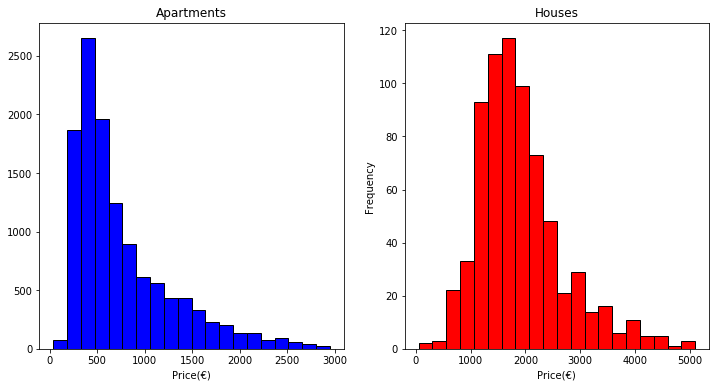

In [66]:
# Immonet Price Histogram

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(immonet_apartments['Price'], bins=20, color='blue', alpha=1, edgecolor='black')
axs[0].set_title('Apartments')
axs[0].set_xlabel('Price(€)')

axs[1].hist(immonet_houses['Price'], bins=20, color='red', alpha=1,edgecolor='black')
axs[1].set_xlabel('Price(€)')
axs[1].set_title('Houses')

plt.ylabel('Frequency')
plt.show()


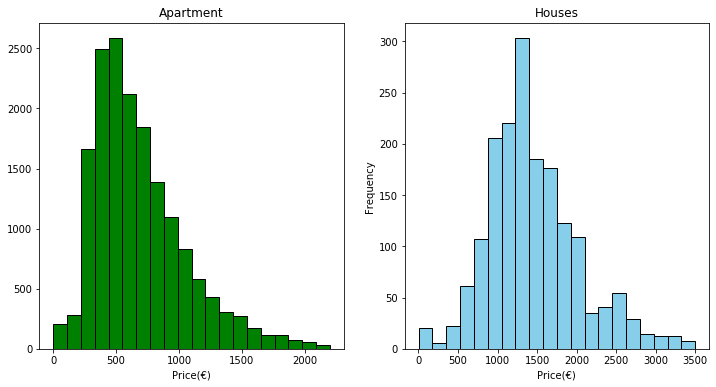

In [67]:
# Houses Price Histogram

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(kleinanzeigen_apartments['Price'], bins=20, color='green', alpha=1, edgecolor='black')
axs[0].set_title('Apartment')
axs[0].set_xlabel('Price(€)')

axs[1].hist(kleinanzeigen_houses['Price'], bins=20, color='skyblue', alpha=1,edgecolor='black')
axs[1].set_xlabel('Price(€)')
axs[1].set_title('Houses')

plt.ylabel('Frequency')
plt.show()


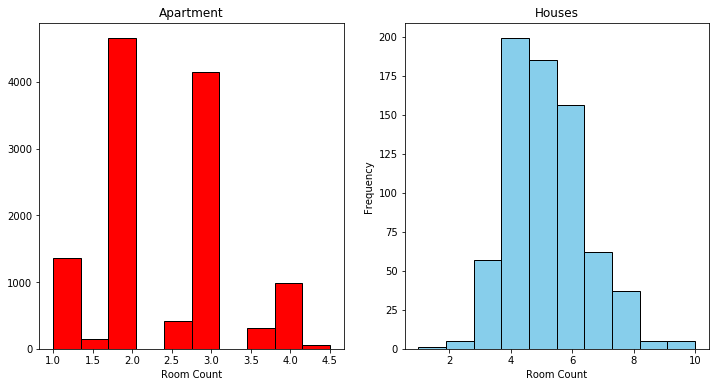

In [68]:
# Immonet Room Counts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(immonet_apartments['Room Count'], bins=10, color='red', alpha=1, edgecolor='black')
axs[0].set_title('Apartment')
axs[0].set_xlabel('Room Count')

axs[1].hist(immonet_houses['Room Count'], bins=10, color='skyblue', alpha=1,edgecolor='black')
axs[1].set_xlabel('Room Count')
axs[1].set_title('Houses')

plt.ylabel('Frequency')
plt.show()


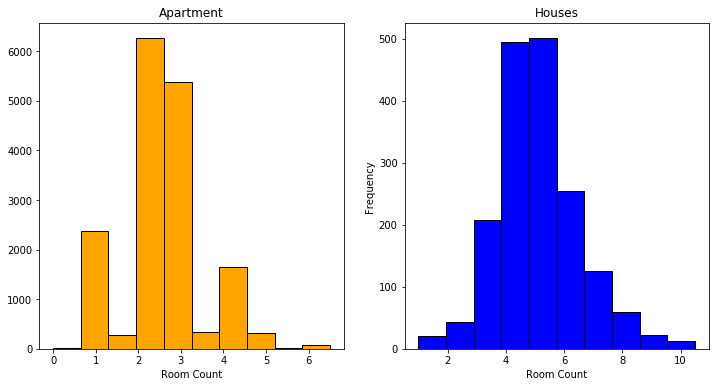

In [69]:
# Kleinanzeigen Room Count
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(kleinanzeigen_apartments['Room Count'], bins=10, color='orange', alpha=1, edgecolor='black')
axs[0].set_title('Apartment')
axs[0].set_xlabel('Room Count')

axs[1].hist(kleinanzeigen_houses['Room Count'], bins=10, color='blue', alpha=1,edgecolor='black')
axs[1].set_xlabel('Room Count')
axs[1].set_title('Houses')

plt.ylabel('Frequency')
plt.show()


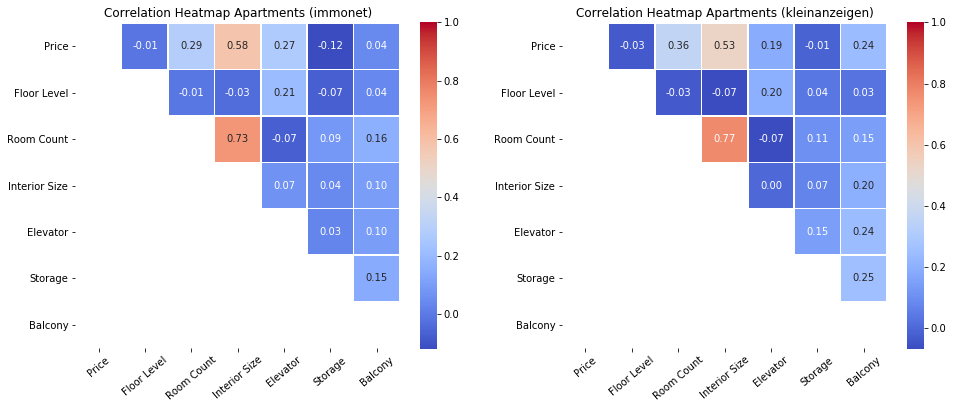

In [70]:
# Correlation for immonet and kleinanzeigen

numerical_data1 = immonet_apartments[['Price', 'Zip Code', 'Floor Level', 'Room Count', 'Interior Size', 'Elevator','Storage','Balcony']]
correlation_matrix1 = numerical_data1.corr()

numerical_data2 = kleinanzeigen_apartments[['Price', 'Zip Code', 'Floor Level', 'Room Count', 'Interior Size', 'Elevator','Storage','Balcony']]
correlation_matrix2 = numerical_data2.corr()

mask1 = np.tril(np.ones_like(correlation_matrix1, dtype=bool))
mask2 = np.tril(np.ones_like(correlation_matrix2, dtype=bool))

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', mask=mask1, square=True, linewidths=.5, ax=axs[0])
axs[0].set_title('Correlation Heatmap Apartments (immonet)')
axs[0].tick_params(axis='x', rotation=40) 

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', mask=mask2, square=True, linewidths=.5, ax=axs[1])
axs[1].set_title('Correlation Heatmap Apartments (kleinanzeigen)')
axs[1].tick_params(axis='x', rotation=40)  

plt.show()

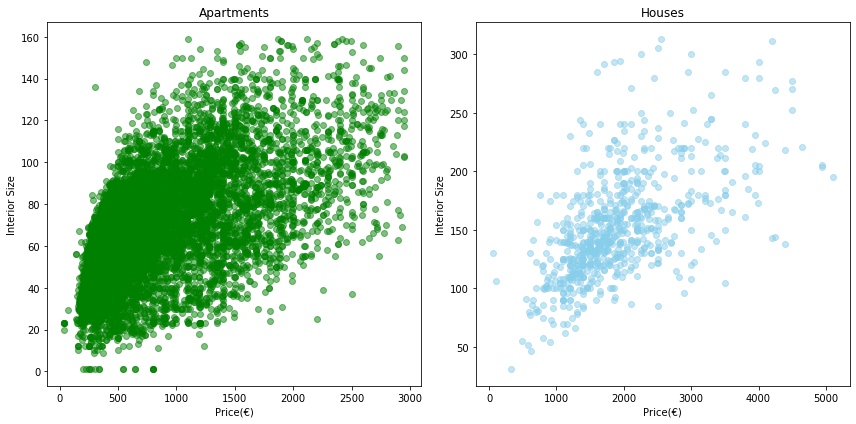

In [71]:
# Immonet Scatter plots

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(immonet_apartments['Price'], immonet_apartments['Interior Size'], color='green', alpha=0.5)
axs[0].set_title('Apartments')
axs[0].set_xlabel('Price(€)')
axs[0].set_ylabel('Interior Size')

axs[1].scatter(immonet_houses['Price'], immonet_houses['Interior Size'], color='skyblue', alpha=0.5)
axs[1].set_title('Houses')
axs[1].set_xlabel('Price(€)')
axs[1].set_ylabel('Interior Size')

plt.tight_layout()
plt.show()

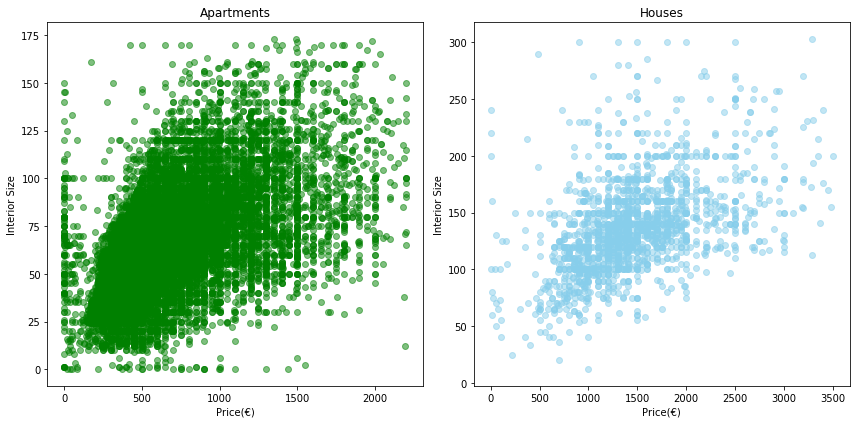

In [72]:
# Kleinanzeigen Scatter plots

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(kleinanzeigen_apartments['Price'], kleinanzeigen_apartments['Interior Size'], color='green', alpha=0.5)
axs[0].set_title('Apartments')
axs[0].set_xlabel('Price(€)')
axs[0].set_ylabel('Interior Size')

axs[1].scatter(kleinanzeigen_houses['Price'], kleinanzeigen_houses['Interior Size'], color='skyblue', alpha=0.5)
axs[1].set_title('Houses')
axs[1].set_xlabel('Price(€)')
axs[1].set_ylabel('Interior Size')

plt.tight_layout()
plt.show()

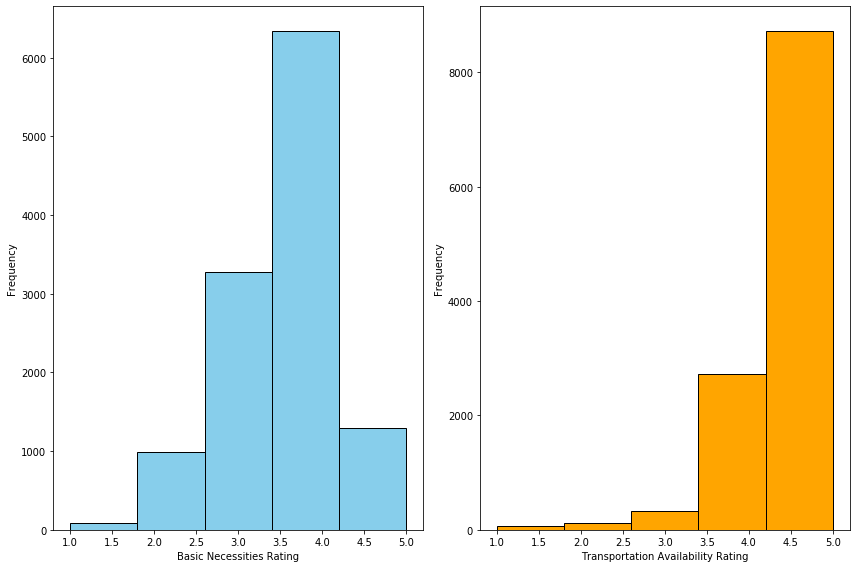

In [78]:
# Apartments Ratings
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].hist(immonet_apartments['Basic Neccessities Rating'], bins=5, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Basic Necessities Rating')
axs[0].set_ylabel('Frequency')

axs[1].hist(immonet_apartments['Transportation Availability Rating'], bins=5, color='orange', edgecolor='black')
axs[1].set_xlabel('Transportation Availability Rating')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

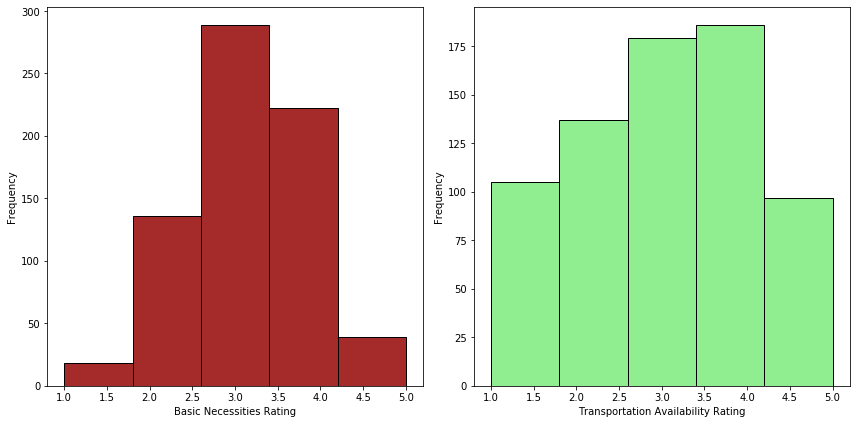

In [74]:
# Houses Ratings
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(immonet_houses['Basic Neccessities Rating'], bins=5, color='brown', edgecolor='black')
axs[0].set_xlabel('Basic Necessities Rating')
axs[0].set_ylabel('Frequency')

axs[1].hist(immonet_houses['Transportation Availability Rating'], bins=5, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Transportation Availability Rating')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()